In [2]:
import pandas as pd #read data1
import numpy as np #works with array
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization


In [3]:
data = pd.read_csv('Titanic-Dataset.csv')



In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# MISSING DATASET

 

In [5]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

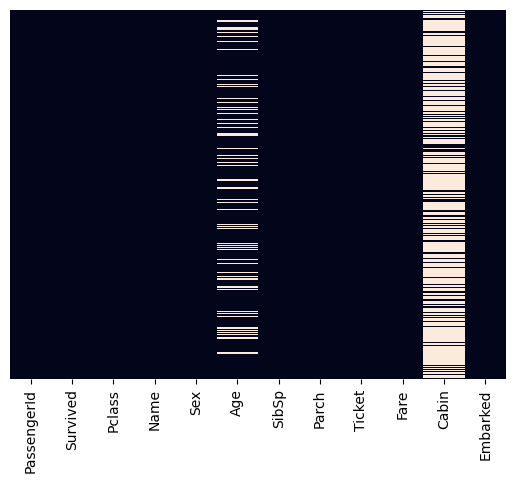

In [6]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False,)


<Axes: xlabel='Survived', ylabel='count'>

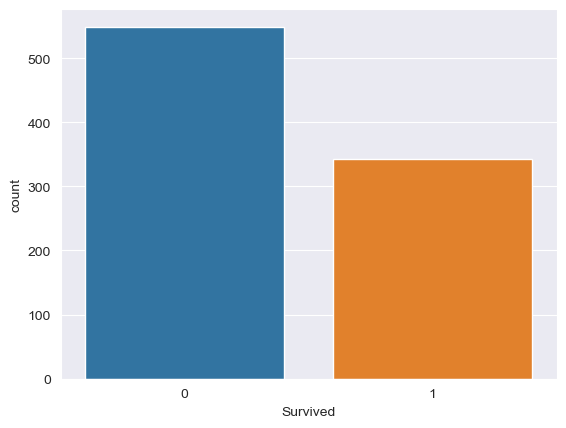

In [7]:
sns.set_style('darkgrid')
sns.countplot(x='Survived', data = data)

# Visualization

<Axes: xlabel='Survived', ylabel='count'>

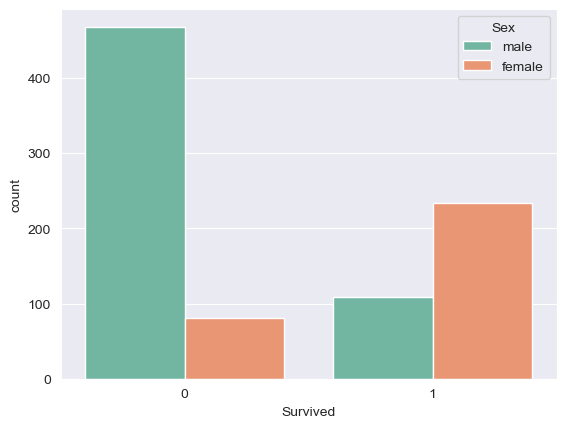

In [8]:
sns.set_style('darkgrid')
sns.countplot(x= 'Survived' , hue='Sex' , data=data , palette ='Set2')

<Axes: xlabel='Survived', ylabel='count'>

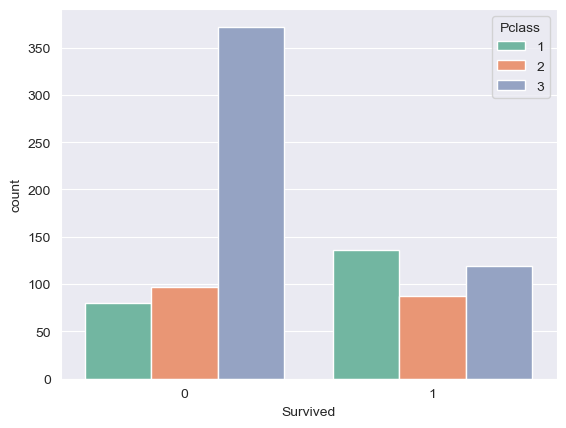

In [9]:
sns.set_style('darkgrid')
sns.countplot(x= 'Survived' , hue='Pclass' , data=data , palette ='Set2')

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


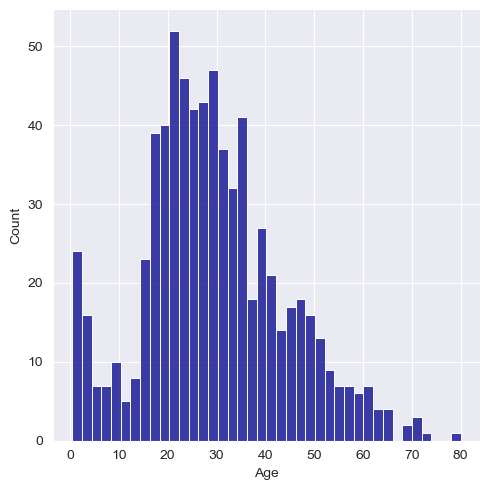

In [10]:
 sns.displot(data['Age'].dropna(),kde=False , color='darkblue' , bins= 40)

<Axes: xlabel='SibSp', ylabel='count'>

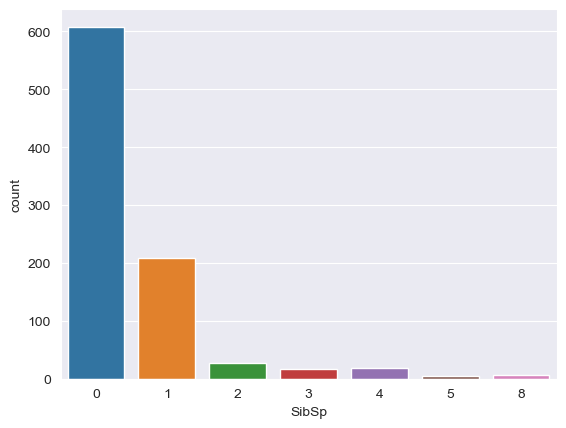

In [11]:
sns.countplot(x= 'SibSp' , data= data)

<Axes: >

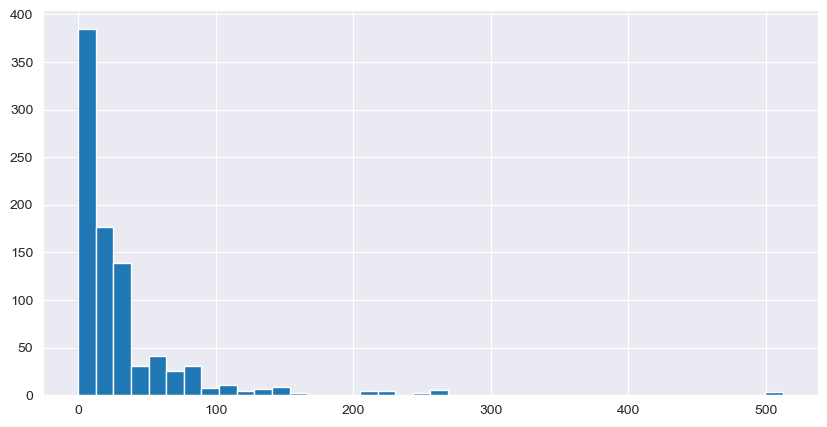

In [12]:
data['Fare'].hist(bins= 40 , figsize =(10,5))

# Data Cleaning

<Axes: xlabel='Pclass', ylabel='Age'>

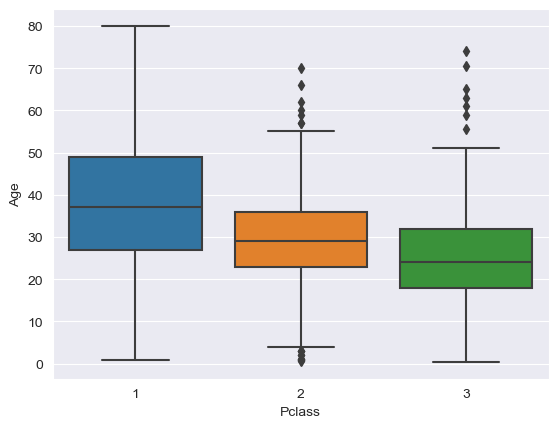

In [13]:
sns.boxplot(x= 'Pclass' , y='Age', data= data)

In [14]:
def age_c(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
    
        elif Pclass == 2:
            return 29
    
        else:
            return 24
    else:
        return Age


In [15]:
data['Age'] = data[['Age', 'Pclass']].apply(age_c, axis=1)

<Axes: >

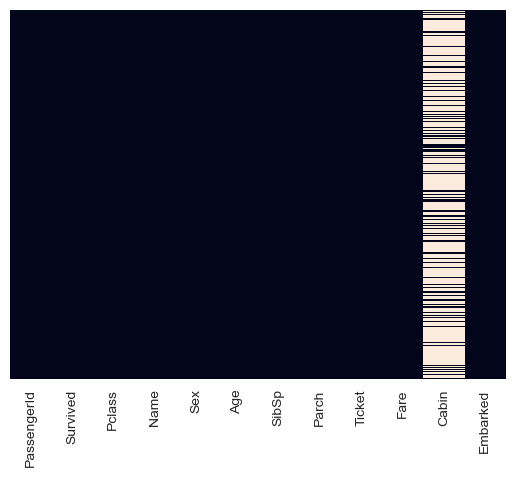

In [16]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False,)


In [17]:
data.drop('Cabin' , axis =1 , inplace =True)

In [18]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

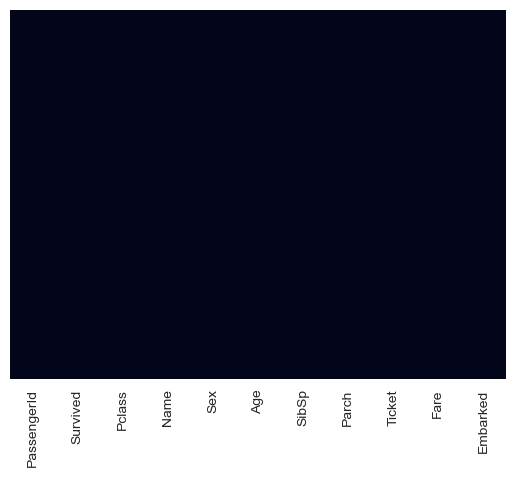

In [19]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False,)

# Converting Categorical Features

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [21]:
pd.get_dummies (data['Embarked'] ,drop_first = True).astype(int).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [22]:
embark= pd.get_dummies(data['Embarked'],drop_first= True)

In [23]:
sex = pd.get_dummies(data['Sex'], drop_first=True).astype(int)

       

In [24]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [25]:
data.drop(['Sex','Embarked', 'Name', 'Ticket'], axis =1 , inplace =True)


In [26]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [27]:
data = pd.concat([data , sex , embark], axis =1)

In [28]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,False,True
1,2,1,1,38.0,1,0,71.2833,0,False,False
2,3,1,3,26.0,0,0,7.9250,0,False,True
3,4,1,1,35.0,1,0,53.1000,0,False,True
4,5,0,3,35.0,0,0,8.0500,1,False,True


# Train Test Split


In [29]:
data.drop('Survived', axis =1) .head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,False,True
1,2,1,38.0,1,0,71.2833,0,False,False
2,3,3,26.0,0,0,7.9250,0,False,True
3,4,1,35.0,1,0,53.1000,0,False,True
4,5,3,35.0,0,0,8.0500,1,False,True


In [33]:
X = data.drop(columns = ['PassengerId','Survived'],axis=1)
Y = data['Survived']

In [34]:
print(X)

     Pclass   Age  SibSp  Parch     Fare  male      Q      S
0         3  22.0      1      0   7.2500     1  False   True
1         1  38.0      1      0  71.2833     0  False  False
2         3  26.0      0      0   7.9250     0  False   True
3         1  35.0      1      0  53.1000     0  False   True
4         3  35.0      0      0   8.0500     1  False   True
..      ...   ...    ...    ...      ...   ...    ...    ...
886       2  27.0      0      0  13.0000     1  False   True
887       1  19.0      0      0  30.0000     0  False   True
888       3  24.0      1      2  23.4500     0  False   True
889       1  26.0      0      0  30.0000     1  False  False
890       3  32.0      0      0   7.7500     1   True  False

[891 rows x 8 columns]


In [35]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [36]:
##Splitting the data into training data & Test data.

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [40]:
print(X.shape, X_train.shape, X_test.shape)

(891, 8) (712, 8) (179, 8)


# Model Training


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [42]:
model = LogisticRegression()

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   male         891 non-null    int32  
 8   Q            891 non-null    bool   
 9   S            891 non-null    bool   
dtypes: bool(2), float64(2), int32(1), int64(5)
memory usage: 54.1 KB


In [45]:
data.astype({'Age':'int','Fare':'int'}).dtypes

PassengerId    int64
Survived       int64
Pclass         int64
Age            int32
SibSp          int64
Parch          int64
Fare           int32
male           int32
Q               bool
S               bool
dtype: object

In [46]:
#training the Logistic Regression model with training data
model.fit(X_train, Y_train)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
#accuracy on training data
X_train_prediction = model.predict(X_train)

In [48]:
print(X_train_prediction)


[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1
 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 1 0 1 0 0 

In [49]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy_score_of_training_data : ', training_data_accuracy)

Accuracy_score_of_training_data :  0.8202247191011236


In [50]:
# accuracy on test data
X_test_prediction = model.predict(X_test)

In [51]:
print(X_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [52]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy_score_of_test data : ', test_data_accuracy)

Accuracy_score_of_test data :  0.7988826815642458
